In [1]:
import sys
sys.path.append('../../')

from IPython.core.display import display
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# settings
CMAP = 'viridis'
dim = 4

In [3]:
# import node embeddings
df = pd.read_csv(
    f"./data/facebook_alpha-0.1_beta-0.1_ws-10_neg-5_lr-0.025_icom-36_ind-36_ds-0.0_d-{dim}_type-BGMM_k-10.txt",
    sep="\t| ",
    header=None
)
df = df.rename(columns={0: 'node'})
df.set_index(['node'], inplace=True)

/Users/anton/miniconda3/envs/MT/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [4]:
# import train
train = pd.read_csv("./data/facebook_train.csv", index_col=0)
train

,u,v
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [5]:
# import predicted labels
labels = np.genfromtxt(f"./data/labels_pred_BGMM_d{dim}_k10.txt")
labels

array([2., 2., 0., ..., 4., 4., 4.])

In [6]:
df['label'] = labels

In [7]:
display(df)
display(df.describe())

,1,2,3,4,label
node,,,,,
0,-4.509360,1.520316,-3.489810,8.272269,2.0
1,-3.275378,0.866180,-2.356718,5.805108,2.0
2,-2.254294,1.251069,-2.442951,5.701817,0.0
3,-3.712162,0.828053,-2.223979,5.584413,2.0
4,-2.422382,1.105556,-2.414031,5.676085,0.0
...,...,...,...,...,...
4033,3.245972,4.872891,-0.008162,1.479098,4.0
4034,2.834398,4.278058,-0.013715,1.279263,4.0
4036,2.793643,4.207842,-0.010883,1.225935,4.0


,1,2,3,4,label
count,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000
mean,-0.030097,1.669013,0.766278,2.005265,4.786831
std,2.933170,1.684725,1.632852,2.488137,2.638391
min,-5.108518,-0.985732,-3.489810,-1.148798,0.000000
25%,-2.092247,0.270469,-0.478161,0.197324,2.000000
50%,-0.598615,1.274636,0.797757,0.866559,6.000000
75%,0.591032,2.849070,1.938878,3.729531,7.000000
max,6.842566,9.671155,4.697134,9.489319,9.000000


In [8]:
# get nx train graph
G = nx.from_pandas_edgelist(train, "u", "v")

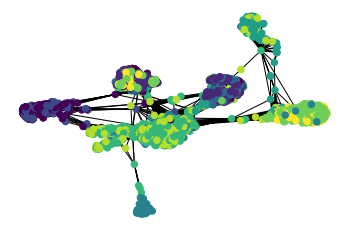

In [9]:
# plot spring graph
plt.axis("off")
nx.draw_networkx(G,
                 node_color=df.label,
                 cmap=plt.get_cmap(CMAP),
                 with_labels=False,
                 node_size=42)
plt.savefig(f"./plots/graph_d{dim}.png")


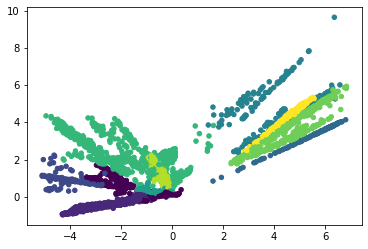

In [10]:
# plot embedding
plt.scatter(df[1], df[2], 20, c=df.label, marker="o", cmap=CMAP)
plt.savefig(f"./plots/node_emb_d{dim}.png")